# Regularization Mathematically

Recall that when we form a linear model, we select the model that minimizes the squared error. For a model of the form
$$y_i = f(x_i) + e_i$$
we minimize the sum
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
This is an example of a _loss function_, a function that measures the cost of inaccurate model predictions. To apply the technique of regularization, we modify the loss function with a term that penalizes more complex models. For example, we could use a loss function of the form:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$
where the vector $\theta$ corresponds to the parameters in our model and $\alpha$ is a parameter that controls penalty strength. Larger $\alpha$ means more of a penalty since it makes the sum larger and we're trying to minimize it.

The classic example is fitting a polynomial to small amounts of data. Let's see how that works with some sample data.

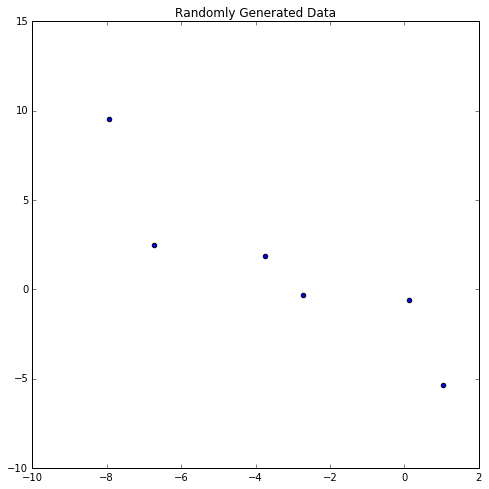

In [73]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 8, 8

# Generate some data
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 5*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.show()

Now we fit a model to the data. If we try to fit a size degree polynomial to the data we should obtain a very overfitted model.

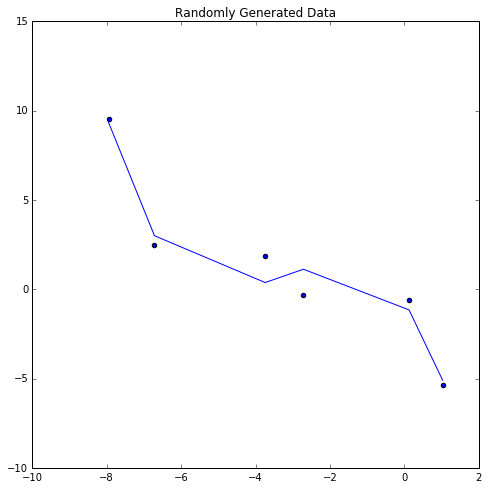

r^2: 0.958783082217


In [74]:
lm = linear_model.LinearRegression()

# This function from numpy builds a matrix of powers for us
X = np.vander(xs, 4)
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", model.score(X, y)

If we apply our model to a another sample of data we should find that the model is a poor fit.

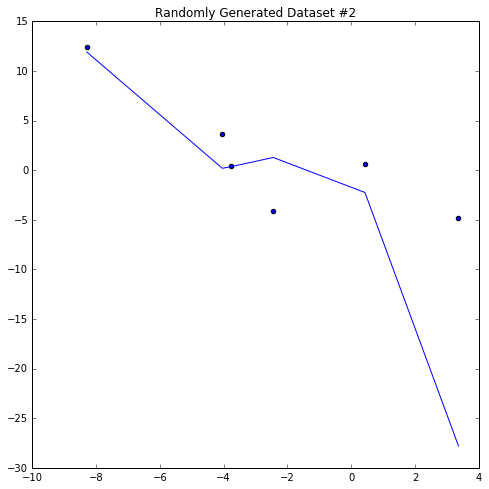

r^2: -1.93229100217


In [75]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", model.score(X, ys2)

# Ridge Regularization
Let's use scikit-learn to run a regression with regularization as we described at the beginning of the notebook. This is called _ridge regression_ and also _Tikhonov regularization_.

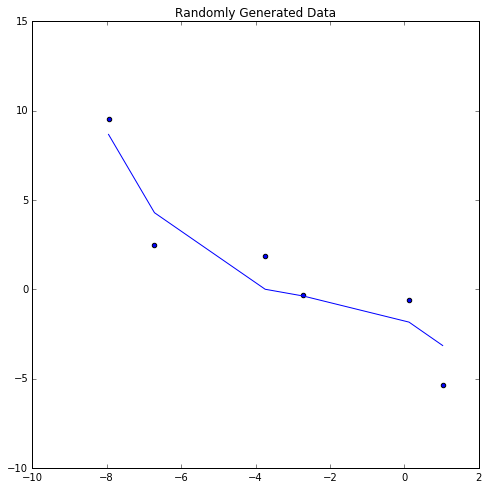

r^2: 0.885936035977


In [78]:
rlm = linear_model.Ridge(alpha=4) # alpha plays the role of lambda in sklearn (lambda is the notation on e.g. Wikipedia)

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)

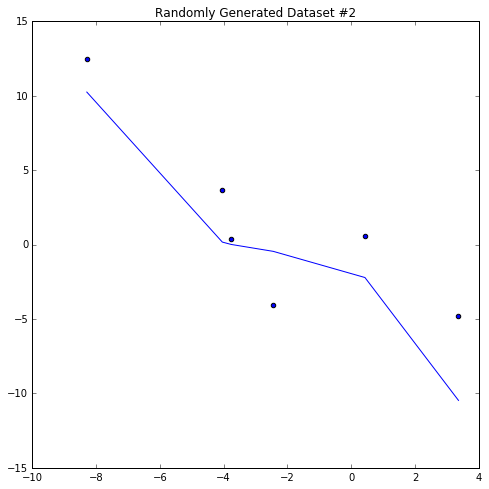

r^2: 0.642764290038


In [79]:
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

You should have seen that the ridge fit was not quite as good on the original data but much better on the second set of data. This is because we prevented overfitting by using regularization. If that didn't happen, rerun the notebook to generate new datasets.

If you'd like to see another example of ridge regularization with linear regression, read through [this example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html) on the scikit-learn website.

# Guided Practice

You may have noticed that in the previous examples the _hyperparameter_ $\alpha$ was set to be four. This was by design since we suspected overfitting and wanted to a larger regularization effect.

In general we have to decide how to choose the parameter $\alpha$ and there are "automated" methods. One such method is _cross-validation_ and scikit-learn provides methods to help. For our guided practice, let's explore the ridge model that has built-in [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). Typically cross-validation works by splitting up the dataset and training the model on different subsets, testing on the remaining points.

In this case the model created by the cross-validating ridge regression `RidgeCV` from scikit-learn automatically tries different values of $\alpha$ as well. Run the following code multiple times. You should see that different values of $\alpha$ are chosen by the cross-validator (with mixed results depending on how different the datasets are).

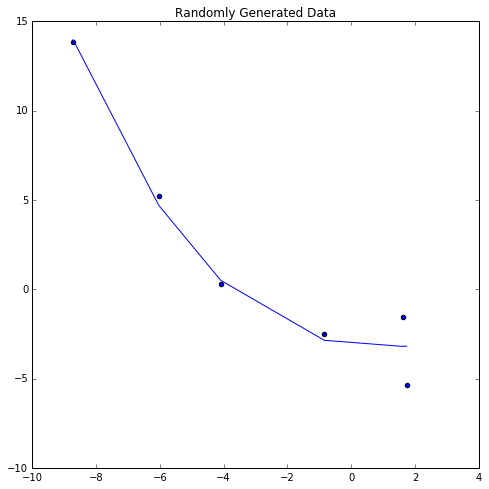

r^2: 0.96680621643
alpha: 10.0


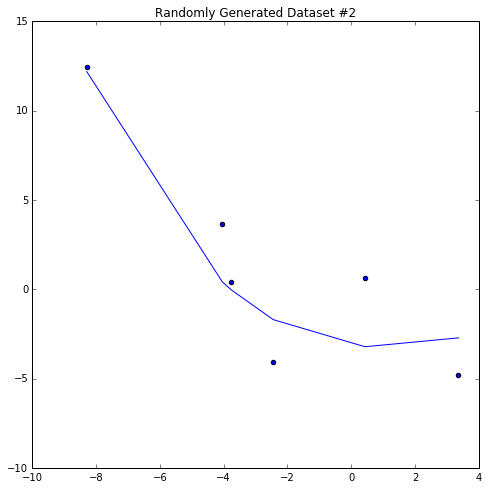

r^2: 0.821395516015


In [87]:
rlmcv = linear_model.RidgeCV()
xs, ys = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)
print "alpha:", rlmcv.alpha_

X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

# Independent Practice

Now let's explore the Boston housing data and apply cross-validation. There is an excellent [example](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html) on the scikit-learn website. Take the code available there and modify it to compare the non-cross-validated fit and the cross-validated fit. You'll need to use [this function](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html) for the cross-validated score.

In [ ]:
# Work through the cross-validation example, adding in r^2 calculations.
# Does cross-validation produce a better fit in this case? Why or why not?

# Once you feel comfortable with it, modify the model to use just the variables RM and LSTAT and repeat


# Lasso

Lasso (least absolute shrinkage and selection operator) is another method of applying regularization. By this point you should be able to modify the examples above to apply the [Lasso model](http://scikit-learn.org/stable/modules/linear_model.html#lasso) from scikit-learn and the cross-validated version `LassoCV`. The main difference between Lasso and Ridge regularization is how the penalty works. Read through the example and explain how the loss functions are different.
